NOTE: The selenium driver must be in your PATH or else screenshots will not render.

In [1]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, DatetimeTickFormatter
from bokeh.models.tools import HoverTool
from bokeh.io.export import get_screenshot_as_png
from bokeh.io import output_notebook
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
output_notebook()
df = pd.read_csv('../../data/central_park_weather.csv', dtype='object')

Loading BokehJS ...

Convert date and temperature formats. Generate columns for day, week, and month.

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['weekday'] = df.DATE.dt.weekday
df['week'] = df.DATE.dt.week
df['month'] = df.DATE.dt.month
df['year'] = df.DATE.dt.year
df = df[df.DATE >= '20010101']
df['TMAX'] = df['TMAX'].astype('int')
df['TMIN'] = df['TMIN'].astype('int')
df['PRCP'] = df['PRCP'].astype('float')
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,...,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,weekday,week,month,year
48212,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,2001
48213,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,2001
48214,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,2001
48215,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,2001
48216,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,",,X",4,1,1,2001


List columns that do not have any missing data. Some of our most important features (temperature and precipitation) are listed so there is no need to handle missing values for those particular features. For the columns that are not listed we will have to do additional work to figure out whether or not they are missing at random before deciding on what to do.

In [4]:
df.columns[~df.isnull().any()].tolist()

['STATION',
 'NAME',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'DATE',
 'PRCP',
 'PRCP_ATTRIBUTES',
 'TMAX',
 'TMAX_ATTRIBUTES',
 'TMIN',
 'TMIN_ATTRIBUTES',
 'weekday',
 'week',
 'month',
 'year']

In [5]:
df = df[df.columns[~df.isnull().any()]]
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,weekday,week,month,year
48212,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-01,0.00,",,0,2400",32,",,0",23,",,0",0,1,1,2001
48213,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-02,0.00,",,0,2400",27,",,0",19,",,0",1,1,1,2001
48214,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-03,0.00,",,0,2400",31,",,0",18,",,0",2,1,1,2001
48215,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-04,0.00,",,0,2400",34,",,0",25,",,0",3,1,1,2001
48216,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-05,0.19,",,0,2400",33,",,0",24,",,0",4,1,1,2001


Visualize the data to get a sense of how it looks. We expect it to be cyclical in nature and this helps confirm that there aren't any glaring issues with the collected data.

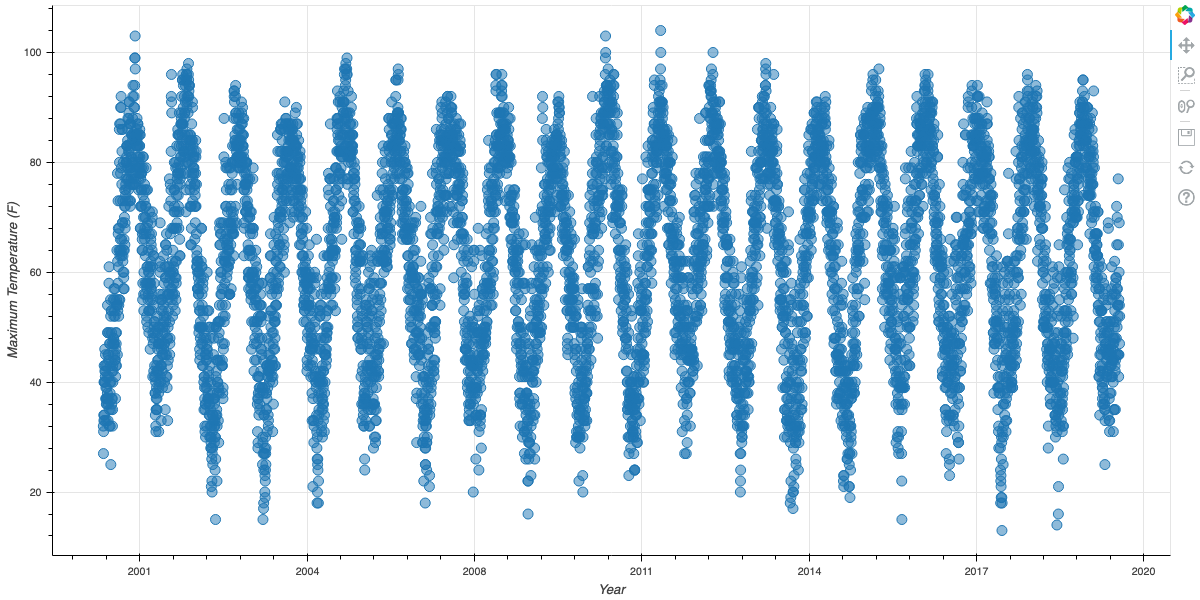

In [6]:
t_max = figure(plot_width=1200, plot_height=600, x_axis_label='Year', y_axis_label='Maximum Temperature (F)')
t_max.xaxis.formatter=DatetimeTickFormatter()
t_max.circle(x='DATE', y='TMAX', source=df, size=10, fill_alpha=.5)
# show(t_max)  # for interactive chart
get_screenshot_as_png(t_max, driver=None)

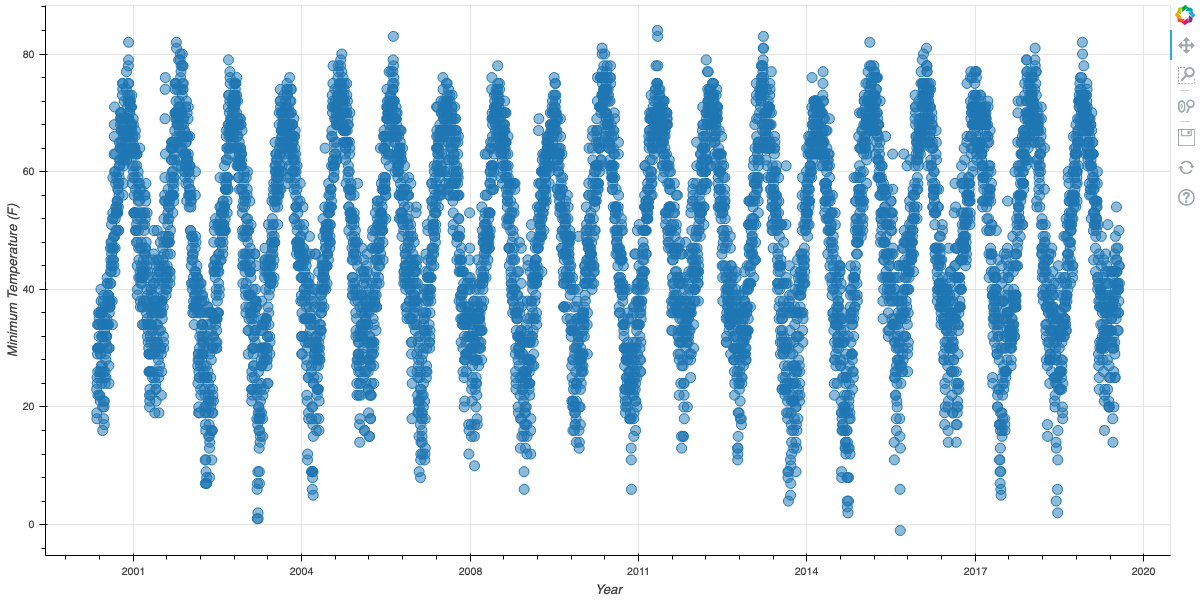

In [7]:
t_min = figure(plot_width=1200, plot_height=600, x_axis_label='Year', y_axis_label='Minimum Temperature (F)')
t_min.xaxis.formatter=DatetimeTickFormatter()
t_min.circle(x='DATE', y='TMIN', source=df, size=10, fill_alpha=.5)
# show(t_min)  # for interactive chart
get_screenshot_as_png(t_min, driver=None)

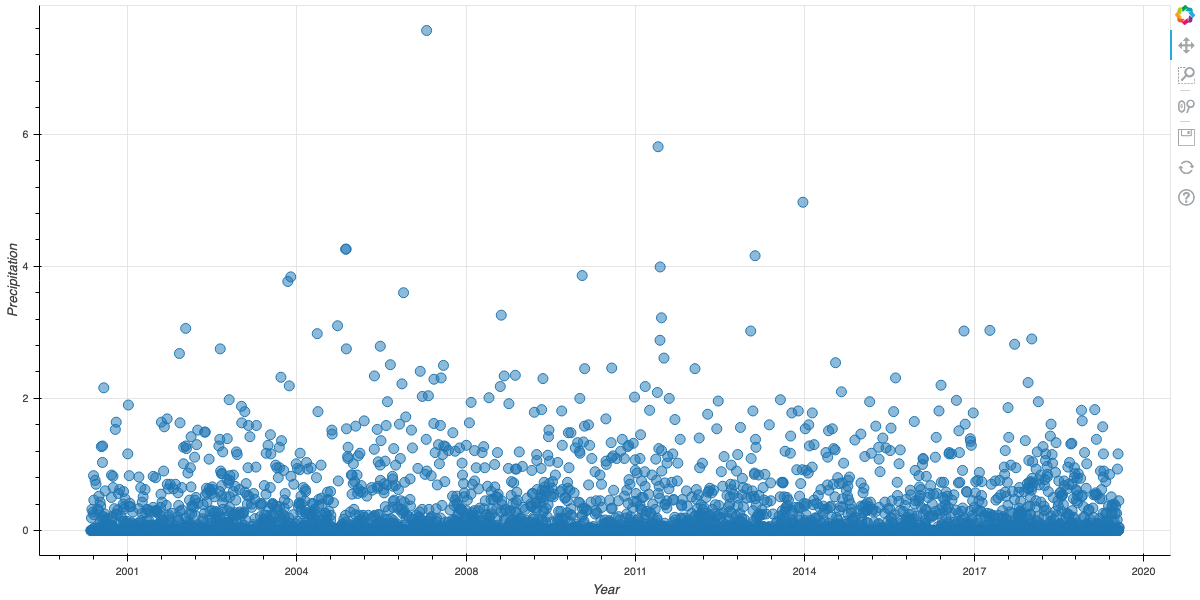

In [8]:
prcp = figure(plot_width=1200, plot_height=600, x_axis_label='Year', y_axis_label='Precipitation')
prcp.xaxis.formatter=DatetimeTickFormatter()
prcp.circle(x='DATE', y='PRCP', source=df, size=10, fill_alpha=.5)
# show(prcp)  # for interactive chart
get_screenshot_as_png(prcp, driver=None)

Precipitation isn't nearly as cyclical as temperature.

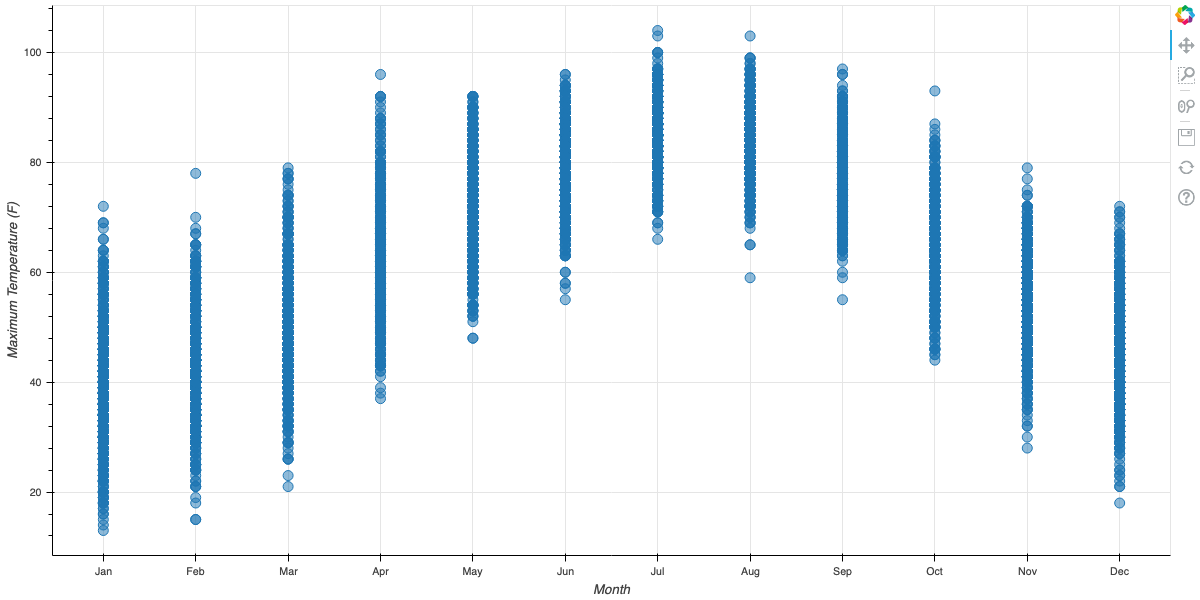

In [9]:
month = figure(plot_width=1200, plot_height=600, x_axis_label='Month', y_axis_label='Maximum Temperature (F)')
month.xaxis.ticker = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month.xaxis.major_label_overrides = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}
month.circle(x='month', y='TMAX', source=df, size=10, fill_alpha=.5)
# show(month)  # for interactive chart
get_screenshot_as_png(month, driver=None)

Here we group the data by month and compute the mean before plotting. This makes it easier to see temperature and precipitation averages.

In [10]:
df_by_month = df.groupby(['month']).mean()
df_by_month

,PRCP,TMAX,TMIN,weekday,week,year
month,,,,,,
1,0.107403,39.417742,27.454839,2.982258,3.862903,2010.500000
2,0.117469,42.300885,28.922124,3.003540,6.989381,2010.513274
3,0.135428,50.192246,35.350565,3.017771,11.214863,2010.484653
4,0.144035,62.550877,45.435088,2.991228,15.561404,2010.000000
5,0.136248,71.570458,54.845501,2.991511,19.918506,2010.000000
6,0.174754,79.547368,63.984211,3.017544,24.271930,2010.000000
7,0.148947,84.991511,69.896435,2.988115,28.633277,2010.000000
8,0.160289,83.706282,68.986418,3.005093,33.059423,2010.000000
9,0.140544,76.989474,62.566667,3.010526,37.415789,2010.000000


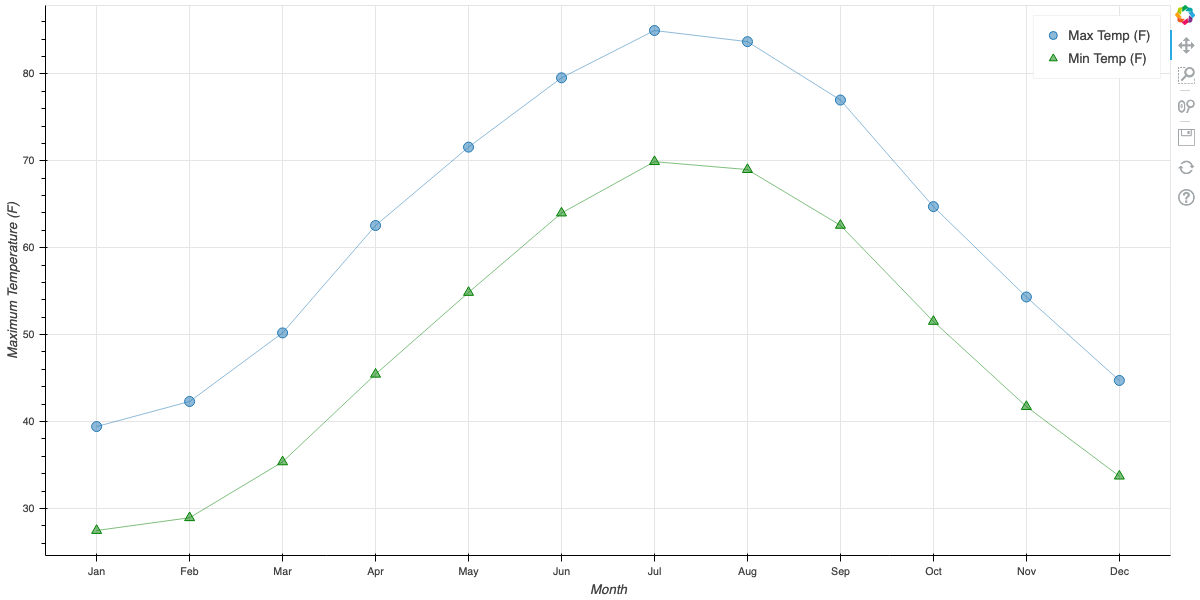

In [11]:
month_avg = figure(plot_width=1200, plot_height=600, x_axis_label='Month', y_axis_label='Maximum Temperature (F)')
month_avg.xaxis.ticker = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_avg.xaxis.major_label_overrides = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}
month_avg.circle(x='month', y='TMAX', source=df_by_month, size=10, fill_alpha=.5, legend_label='Max Temp (F)')
month_avg.line(x='month', y='TMAX', source=df_by_month, alpha=.5)
month_avg.triangle(x='month', y='TMIN', source=df_by_month, size=10, fill_alpha=.5, color='green', legend_label='Min Temp (F)')
month_avg.line(x='month', y='TMIN', source=df_by_month, alpha=.5, color='green')
# show(month_avg)  # for interactive chart
get_screenshot_as_png(month_avg, driver=None)

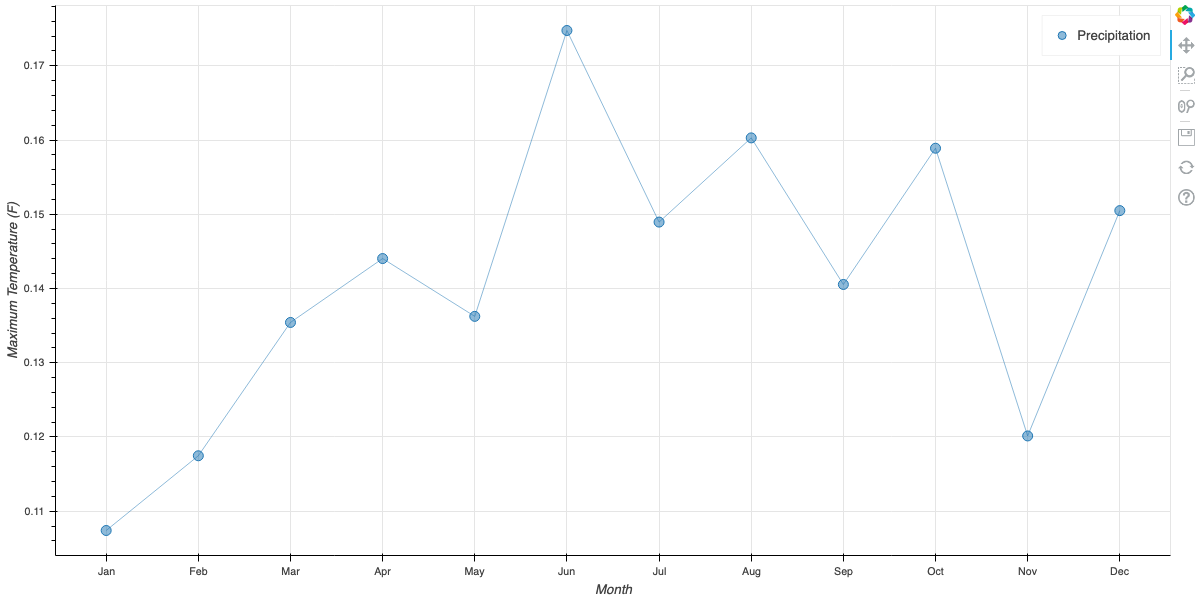

In [12]:
month_avg = figure(plot_width=1200, plot_height=600, x_axis_label='Month', y_axis_label='Maximum Temperature (F)')
month_avg.xaxis.ticker = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_avg.xaxis.major_label_overrides = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}
month_avg.circle(x='month', y='PRCP', source=df_by_month, size=10, fill_alpha=.5, legend_label='Precipitation')
month_avg.line(x='month', y='PRCP', source=df_by_month, alpha=.5)
# show(month_avg)  # for interactive chart
get_screenshot_as_png(month_avg, driver=None)

We also group by year to look for trends.

In [13]:
df_by_year = df[df['year'] < 2020].groupby(['year']).mean()
df_by_year

,PRCP,TMAX,TMIN,weekday,week,month
year,,,,,,
2001,0.097671,63.531507,49.068493,2.991781,26.430137,6.526027
2002,0.123836,63.860274,49.101370,2.994521,26.430137,6.526027
2003,0.160055,60.263014,46.764384,2.997260,26.430137,6.526027
2004,0.141885,61.494536,47.557377,3.002732,27.071038,6.513661
2005,0.153342,62.986301,48.602740,3.005479,26.575342,6.526027
2006,0.164082,63.986301,49.838356,3.008219,26.569863,6.526027
2007,0.168959,62.449315,47.920548,2.991781,26.430137,6.526027
2008,0.146475,62.882514,47.893443,2.991803,26.360656,6.513661
2009,0.146904,60.997260,47.189041,3.000000,27.000000,6.526027


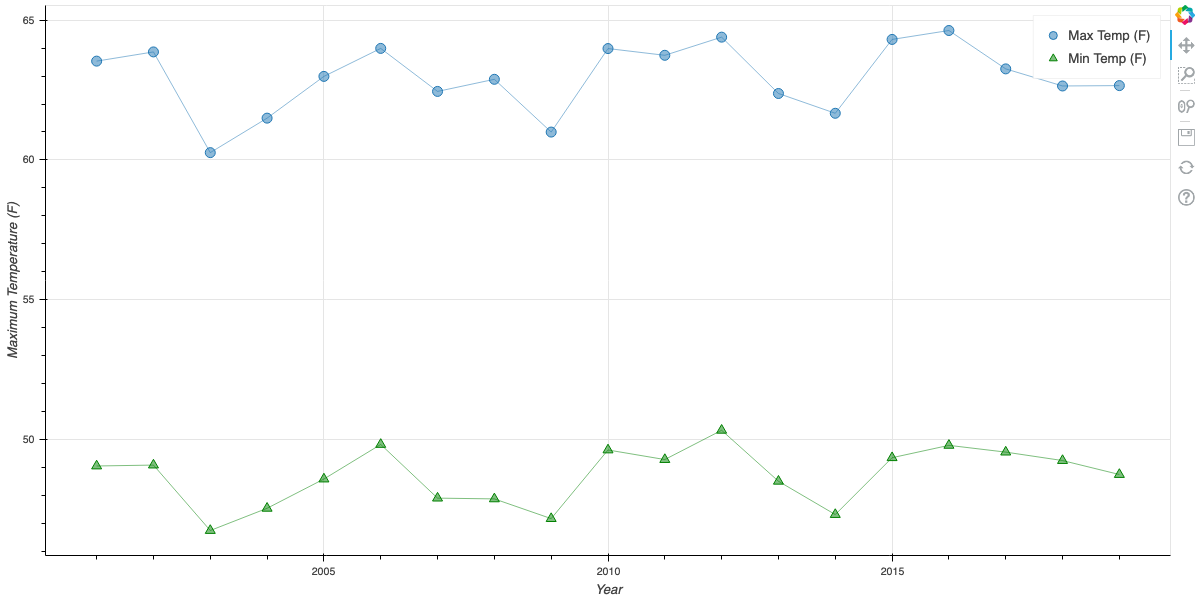

In [14]:
year_avg = figure(plot_width=1200, plot_height=600, x_axis_label='Year', y_axis_label='Maximum Temperature (F)')
year_avg.circle(x='year', y='TMAX', source=df_by_year, size=10, fill_alpha=.5, legend_label='Max Temp (F)')
year_avg.line(x='year', y='TMAX', source=df_by_year, alpha=.5)
year_avg.triangle(x='year', y='TMIN', source=df_by_year, size=10, fill_alpha=.5, color='green', legend_label='Min Temp (F)')
year_avg.line(x='year', y='TMIN', source=df_by_year, alpha=.5, color='green')
# show(year_avg)  # for interactive chart
get_screenshot_as_png(year_avg, driver=None)

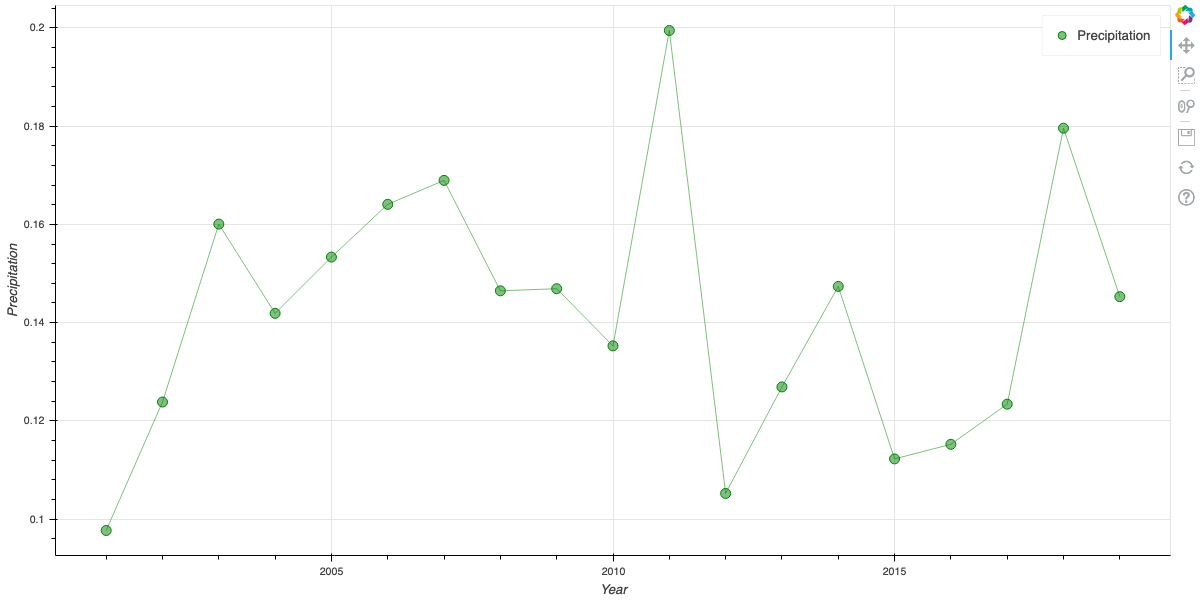

In [15]:
year_avg = figure(plot_width=1200, plot_height=600, x_axis_label='Year', y_axis_label='Precipitation')
year_avg.circle(x='year', y='PRCP', source=df_by_year, size=10, fill_alpha=.5, color='green', legend_label='Precipitation')
year_avg.line(x='year', y='PRCP', source=df_by_year, alpha=.5, color='green')
# show(year_avg)  # for interactive chart
get_screenshot_as_png(year_avg, driver=None)